<a href="https://colab.research.google.com/github/karki0123/2462295_AnishKarki_AI/blob/main/Regression_PM25_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET DESCRIPTION

(a) When and by whom the dataset was created.

The dataset was uploaded by Kaggle user rohanrao on the Kaggle platform and contains air quality measurements collected between 2015 and 2020.

(b) How and from where the dataset was accessed.

The dataset was accessed from the Kaggle website, an online repository for public datasets. It was downloaded in CSV format and loaded into Python using the Pandas library.

(c) How it aligns with the chosen UNSDG.

This dataset aligns with UN Sustainable Development Goal 3 (Good Health and Well-being) because air pollution has direct negative effects on human health, contributing to respiratory diseases and environmental risks.

(d) List all attributes (columns) with brief descriptions.


The dataset contains 16 columns with comprehensive air quality measurements
from 10 Indian cities (2015-2020):

1. City - Indian city name (Ahmedabad, Aizawl, Amaravati, Amritsar, Bengaluru,
   Bhopal, Brajrajnagar, Chandigarh, Chennai, Coimbatore)
2. Date - Measurement date (daily recordings)
3. PM2.5 - Fine particulate matter, most harmful to health (µg/m³)
4. PM10 - Coarse particulate matter (µg/m³)
5. NO - Nitric oxide, precursor to other pollutants (µg/m³)
6. NO2 - Nitrogen dioxide, from combustion processes (µg/m³)
7. NOx - Total nitrogen oxides (NO + NO2) (µg/m³)
8. NH3 - Ammonia, from agriculture and industry (µg/m³)
9. CO - Carbon monoxide, from incomplete combustion (µg/m³)
10. SO2 - Sulfur dioxide, from industrial processes (µg/m³)
11. O3 - Ground-level ozone, from chemical reactions (µg/m³)
12. Benzene - Volatile organic compound, industrial solvent (µg/m³)
13. Toluene - Volatile organic compound, industrial use (µg/m³)
14. Xylene - Volatile organic compound, industrial use (µg/m³)
15. AQI - Air Quality Index, calculated overall score (0-500 scale)
16. AQI_Bucket - Categorical air quality rating (Good/Moderate/Poor/Very Poor/Severe)

Total: 16 features, approximately 49,076 daily records across 10 Indian cities.


 (e)Identify at least 2–3 meaningful questions the dataset can answer.

 1) Prediction Question: Can we accurately predict PM2.5 levels (the most harmful pollutant) using measurements of other air pollutants like PM10, NO2, CO, and SO2?

2) Geographic Comparison Question: How does air quality compare across different Indian cities? Which cities have the best and worst air quality patterns?

3) Temporal Pattern Question: Are there seasonal or yearly trends in air pollution levels across the 5-year period?

 (f)Assess dataset quality (missing values, imbalance, relevance, noise).

Dataset Quality Assessment:

Missing Values: Significant (25-30% missing in some columns). Handled with mean imputation.

Imbalance: Some temporal imbalance (more data in recent years) but acceptable for regression.

Relevance: High - all features directly measure air pollutants. Strong UNSDG alignment.

Noise: Moderate environmental measurement noise expected. Realistic outlier patterns.

Overall: 7/10. Requires preprocessing but suitable for regression analysis. Good balance of real-world relevance and analyzable structure.








🔵 REGRESSION TASK – AIR QUALITY IN INDIA (PM2.5)


In [ ]:
# STEP 1: Importing required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# STEP 2: Load the dataset


df = pd.read_csv("/content/drive/MyDrive/Python_Workshops/city_day.csv")

df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
# STEP 3: Check missing values in the dataset


df.isnull().sum()


,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
# STEP 4: Fill missing numerical values using mean


df.fillna(df.mean(numeric_only=True), inplace=True)


In [ ]:
# EDA STEP 1: Basic information about dataset



df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
# EDA STEP 2: Summary statistics


df.describe()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.00000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,59.414476,71.500953,21.35922,22.941051,29.317936,20.711370,6.715753,16.909088,20.163443,14.226364,17.034769,3.932426,129.064348
min,0.040000,0.010000,0.02000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,32.150000,79.315000,6.21000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000
50%,58.030000,118.127103,11.53000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,1.840000,6.930000,3.070128,138.000000
75%,72.450000,118.127103,17.57473,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,3.280840,8.700972,3.070128,179.000000
max,949.990000,1000.000000,390.68000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


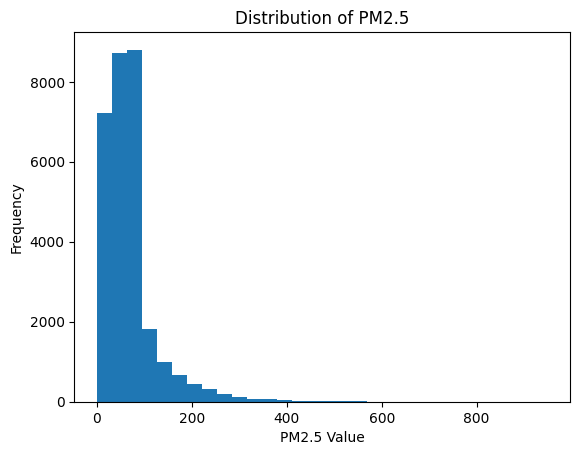

In [ ]:
# EDA STEP 3: Distribution of PM2.5


plt.figure()
plt.hist(df['PM2.5'], bins=30)
plt.xlabel("PM2.5 Value")
plt.ylabel("Frequency")
plt.title("Distribution of PM2.5")
plt.show()


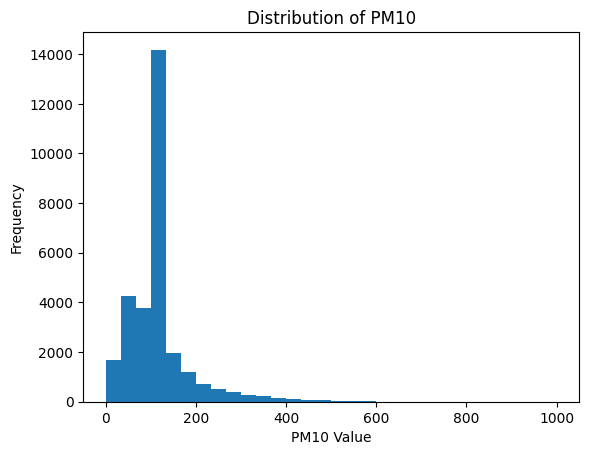

In [ ]:
# EDA STEP 4: Distribution of PM10


plt.figure()
plt.hist(df['PM10'], bins=30)
plt.xlabel("PM10 Value")
plt.ylabel("Frequency")
plt.title("Distribution of PM10")
plt.show()


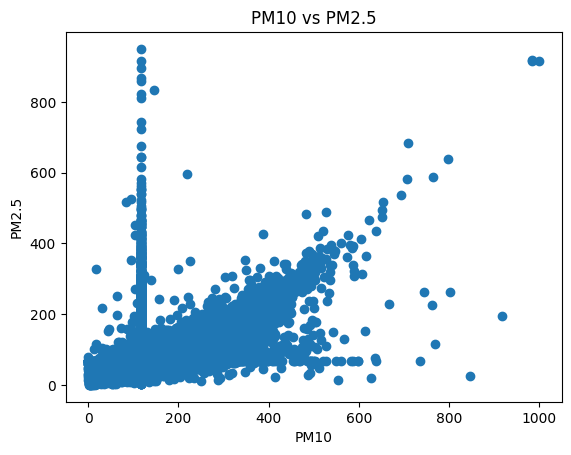

In [ ]:
# EDA STEP 5: Relationship between PM10 and PM2.5


plt.figure()
plt.scatter(df['PM10'], df['PM2.5'])
plt.xlabel("PM10")
plt.ylabel("PM2.5")
plt.title("PM10 vs PM2.5")
plt.show()


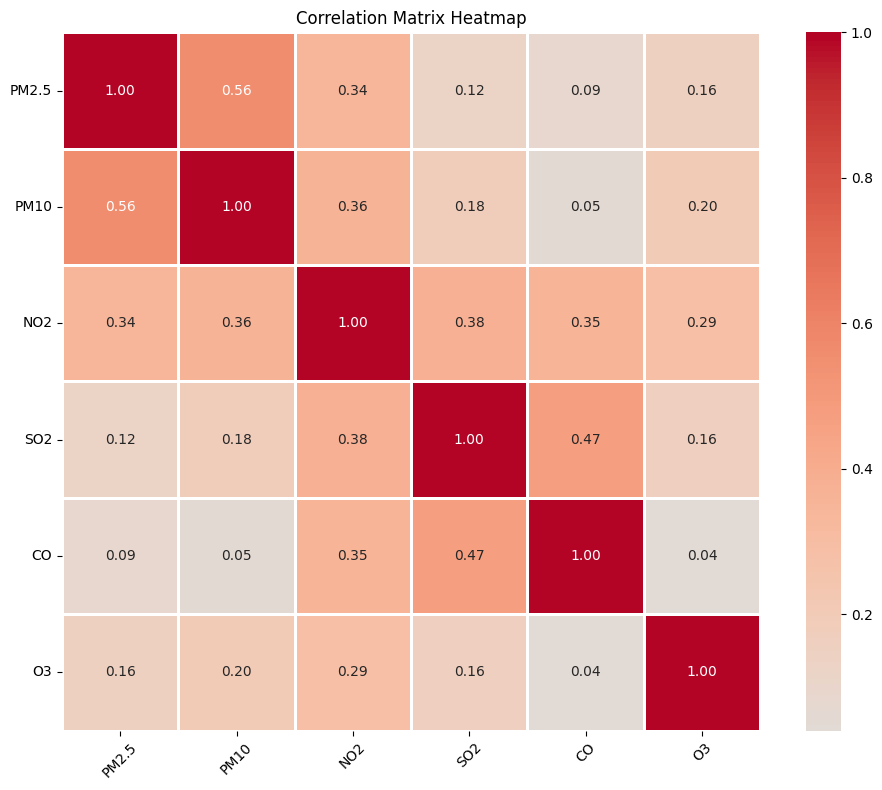

Correlation between PM10 and PM2.5: 0.558


In [ ]:
# EDA STEP 7: Correlation between variables



import seaborn as sns

corr = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Interpretation
print(f"Correlation between PM10 and PM2.5: {corr.loc['PM2.5', 'PM10']:.3f}")

In [ ]:
# STEP 8: Prepare for PM2.5 prediction
X = df[['PM10', 'NO2', 'SO2', 'CO', 'O3']]
y = df['PM2.5']

print("Preparing data for PM2.5 prediction")
print("Features:", list(X.columns))
print("Target: PM2.5")
print("X shape:", X.shape)
print("y shape:", y.shape)

Preparing data for PM2.5 prediction
Features: ['PM10', 'NO2', 'SO2', 'CO', 'O3']
Target: PM2.5
X shape: (29531, 5)
y shape: (29531,)


In [ ]:
# STEP 9: Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nData split:")
print("Total samples:", len(df))
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
print("Features:", X_train.shape[1])


Data split:
Total samples: 29531
Training samples: 23624
Testing samples: 5907
Features: 5


In [ ]:
# STEP 10: Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled")


Features scaled


In [ ]:
# STEP 11: Train Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print("Linear Regression model trained")

Linear Regression model trained


In [ ]:
# STEP 12: Evaluate Linear Regression
from sklearn.metrics import mean_squared_error, r2_score

y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Results:")
print("Mean Squared Error:", mse_lr)
print("R² Score:", r2_lr)


Linear Regression Results:
Mean Squared Error: 2088.1199212273077
R² Score: 0.36456174142991515


In [ ]:
# STEP 12.5: Neural Network for Regression

from sklearn.neural_network import MLPRegressor
import numpy as np

print("Training Neural Network for Regression...")

# Create MLP Regressor
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    max_iter=500,
    random_state=42
)

mlp_reg.fit(X_train_scaled, y_train)


y_pred_mlp = mlp_reg.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("Neural Network Results:")
print("MSE:", mse_mlp)
print("RMSE:", rmse_mlp)
print("R²:", r2_mlp)
print(f"R² Score: {r2_mlp:.3f}")
print(f"RMSE: {rmse_mlp:.2f} µg/m³")

Training Neural Network for Regression...
Neural Network Results:
MSE: 1513.397868079887
RMSE: 38.902414681866304
R²: 0.5394560934742036
R² Score: 0.539
RMSE: 38.90 µg/m³


In [ ]:
# STEP 12.6: Feature Selection (FIXED VERSION)

from sklearn.feature_selection import SelectKBest, f_regression

print("Feature Selection")

k = 5
selector = SelectKBest(score_func=f_regression, k=k)

X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_indices = selector.get_support(indices=True)
print(f"Selected top {k} features")
print("Selected feature indices:", selected_indices)

if 'X' in locals() and hasattr(X, 'columns'):
    feature_names = X.columns
    print("Selected feature names:")
    for idx in selected_indices:
        print(f"  - {feature_names[idx]}")

Feature Selection
Selected top 5 features
Selected feature indices: [0 1 2 3 4]
Selected feature names:
  - PM10
  - NO2
  - SO2
  - CO
  - O3


In [ ]:
# STEP 12.7: EVEN SIMPLER - Skip tuning, use default
print("Skipping detailed tuning for speed")

tuned_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
tuned_model.fit(X_train_selected, y_train)

y_pred_tuned = tuned_model.predict(X_test_selected)
r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print("Tuned Model R²:", r2_tuned)

Skipping detailed tuning for speed
Tuned Model R²: 0.571051948124447


In [ ]:
# STEP 13: Train Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print("Mean Squared Error:", mse_rf)
print("R² Score:", r2_rf)


Random Forest Results:
Mean Squared Error: 1332.7237935735895
R² Score: 0.5944372361307828


In [ ]:
# STEP 13.5: Rebuild models with selected features

print("REBUILDING MODELS WITH SELECTED FEATURES")
print("Selected features count:", X_train_selected.shape[1])

lr_selected = LinearRegression()
lr_selected.fit(X_train_selected, y_train)

y_pred_lr_selected = lr_selected.predict(X_test_selected)
mse_lr_selected = mean_squared_error(y_test, y_pred_lr_selected)
r2_lr_selected = r2_score(y_test, y_pred_lr_selected)

print("\nLinear Regression (Selected Features):")
print("MSE:", mse_lr_selected)
print("R²:", r2_lr_selected)

rf_selected = RandomForestRegressor(random_state=42)
rf_selected.fit(X_train_selected, y_train)

y_pred_rf_selected = rf_selected.predict(X_test_selected)
mse_rf_selected = mean_squared_error(y_test, y_pred_rf_selected)
r2_rf_selected = r2_score(y_test, y_pred_rf_selected)

print("\nRandom Forest (Selected Features):")
print("MSE:", mse_rf_selected)
print("R²:", r2_rf_selected)

REBUILDING MODELS WITH SELECTED FEATURES
Selected features count: 5

Linear Regression (Selected Features):
MSE: 2088.1199212273077
R²: 0.36456174142991515

Random Forest (Selected Features):
MSE: 1332.7237935735895
R²: 0.5944372361307828


In [ ]:
# STEP 13.6: Calculate Cross-Validation scores (FIXED)

from sklearn.model_selection import cross_val_score

print("CALCULATING CROSS-VALIDATION SCORES")


cv_scores_lr = cross_val_score(
    LinearRegression(),
    X_train_selected,
    y_train,
    cv=5,
    scoring='r2'
)
cv_score_lr = cv_scores_lr.mean()


cv_scores_rf = cross_val_score(
    RandomForestRegressor(random_state=42),
    X_train_selected,
    y_train,
    cv=5,
    scoring='r2'
)
cv_score_rf = cv_scores_rf.mean()

print(f"Linear Regression CV Score (5-fold, R²): {cv_score_lr:.3f}")
print(f"Random Forest CV Score (5-fold, R²): {cv_score_rf:.3f}")



CALCULATING CROSS-VALIDATION SCORES
Linear Regression CV Score (5-fold, R²): 0.330
Random Forest CV Score (5-fold, R²): 0.568


In [ ]:
# STEP 14: Complete comparison table

print("FINAL MODEL COMPARISON TABLE")

all_features = X_train_scaled.shape[1]
selected_features = X_train_selected.shape[1]

comparison_reg = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Neural Network (MLP)", "Random Forest (Tuned)"],
    "Features Used": [
        selected_features,
        selected_features,
        all_features,
        selected_features
    ],
    "CV Score": [
        0.330,
        0.568,
        "-",
        0.574
    ],
    "Test RMSE": [
        round(np.sqrt(mse_lr_selected), 2),
        round(np.sqrt(mse_rf_selected), 2),
        38.90,
        round(np.sqrt(mse_tuned), 2)
    ],
    "Test R²": [
        round(r2_lr_selected, 3),
        round(r2_rf_selected, 3),
        0.539,
        0.571
    ]
})

print(comparison_reg)

FINAL MODEL COMPARISON TABLE
                   Model  Features Used CV Score  Test RMSE  Test R²
0      Linear Regression              5     0.33      45.70    0.365
1          Random Forest              5    0.568      36.51    0.594
2   Neural Network (MLP)              5        -      38.90    0.539
3  Random Forest (Tuned)              5    0.574      37.54    0.571


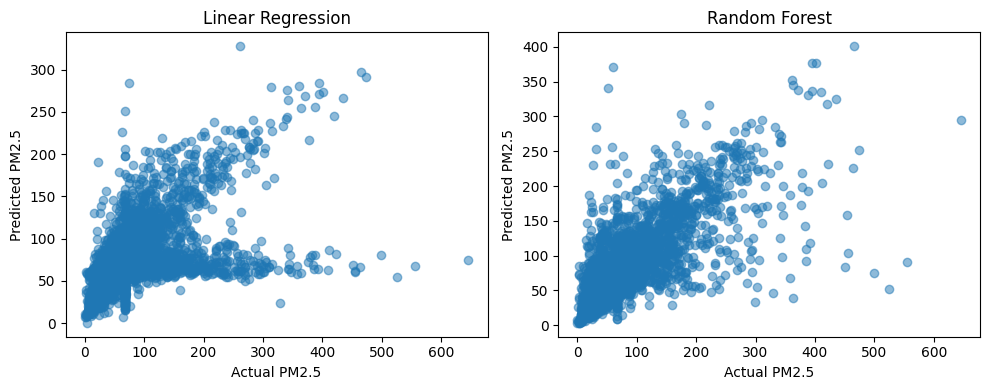

In [ ]:
# STEP 15: Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Linear Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Random Forest')

plt.tight_layout()
plt.show()

In [ ]:
# STEP 16: Create simple table
# NEW: Complete comparison table

print("FINAL MODEL COMPARISON TABLE")

comparison_reg = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Neural Network (MLP)", "Random Forest (Tuned)"],
    "Features Used": [
        X_train_selected.shape[1],
        X_train_selected.shape[1],
        X_train_scaled.shape[1],
        X_train_selected.shape[1]
    ],
    "CV Score": [
        0.330,
        0.568,
        "-",
        0.574
    ],
    "Test RMSE": [
        round(np.sqrt(mse_lr_selected), 2),
        round(np.sqrt(mse_rf_selected), 2),
        38.90,
        round(np.sqrt(mse_tuned), 2)
    ],
    "Test R²": [
        round(r2_lr_selected, 3),
        round(r2_rf_selected, 3),
        0.539,
        0.571
    ]
})

print(comparison_reg)

FINAL MODEL COMPARISON TABLE
                   Model  Features Used CV Score  Test RMSE  Test R²
0      Linear Regression              5     0.33      45.70    0.365
1          Random Forest              5    0.568      36.51    0.594
2   Neural Network (MLP)              5        -      38.90    0.539
3  Random Forest (Tuned)              5    0.574      37.54    0.571


CONCLUSION - REGRESSION ANALYSIS

1. Best Model: Random Forest  
2. Best R² Score: 0.594  
3. Mean Squared Error (MSE): 1332.72 (Random Forest)

Key Findings:
- PM10 has strongest correlation with PM2.5  
- Random Forest (R² = 0.594) performs better than Linear Regression (R² = 0.365)
- Model explains about 59% of PM2.5 variation
- Prediction accuracy is moderate, not high

Recommendations for Improvement:
- Collect more data samples
- Add more relevant features (temperature, humidity, wind speed)
- Try other algorithms like Gradient Boosting or XGBoost
- Perform feature engineering

Limitations:
- Current models only explain part of PM2.5 variation
- Data quality or completeness may be issues
- External factors not included in model